In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
data = pd.read_csv('results.csv', encoding='cp1252' )

In [11]:
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [13]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,11113.000000,11113.000000,10189.000000,10189.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.518222,1.141456,0.684758,0.501031,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.301981,1.135907,0.836299,0.722299,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


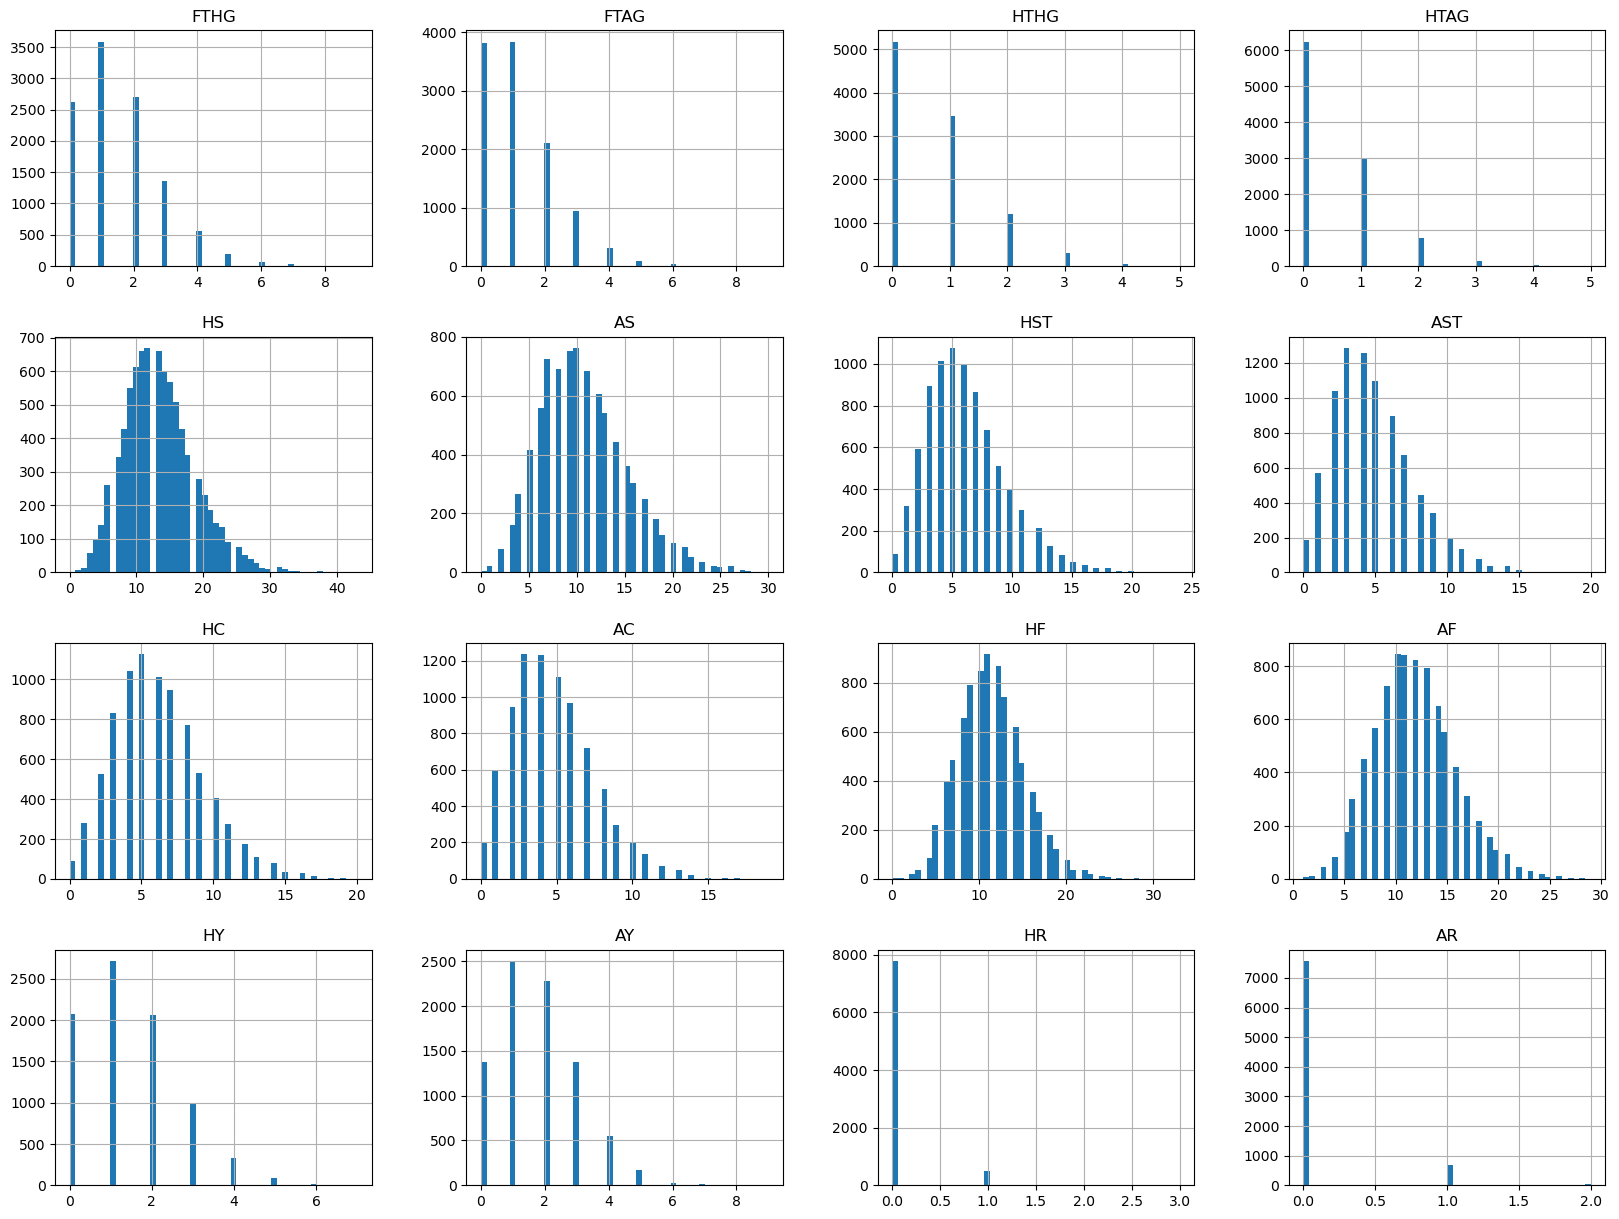

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
data.corr()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
FTHG,1.000000,-0.055474,0.692205,-0.028116,0.284396,-0.133890,0.428989,-0.101616,0.030039,-0.069795,-0.073215,-0.037772,-0.120043,-0.001105,-0.078263,0.084418
FTAG,-0.055474,1.000000,-0.042349,0.681635,-0.131977,0.321986,-0.119939,0.447177,-0.075708,0.046079,0.007821,-0.030943,0.111333,-0.026429,0.118311,-0.069321
HTHG,0.692205,-0.042349,1.000000,-0.031473,0.121255,-0.032518,0.254239,-0.040557,-0.050858,0.012627,-0.016722,-0.025591,-0.087246,0.000440,-0.030377,0.036594
HTAG,-0.028116,0.681635,-0.031473,1.000000,-0.052253,0.176819,-0.071537,0.284444,-0.021044,-0.018624,-0.008256,-0.000478,0.099135,-0.010679,0.074974,-0.024422
HS,0.284396,-0.131977,0.121255,-0.052253,1.000000,-0.327917,0.680876,-0.234976,0.473559,-0.278978,-0.159214,-0.030133,-0.111140,0.024796,-0.107159,0.093262
AS,-0.133890,0.321986,-0.032518,0.176819,-0.327917,1.000000,-0.255375,0.692899,-0.309153,0.468485,0.022367,-0.121607,0.113025,-0.073150,0.110450,-0.105952
HST,0.428989,-0.119939,0.254239,-0.071537,0.680876,-0.255375,1.000000,-0.036218,0.355921,-0.165496,-0.061614,0.027909,-0.139389,0.009737,-0.069696,0.087084
AST,-0.101616,0.447177,-0.040557,0.284444,-0.234976,0.692899,-0.036218,1.000000,-0.173576,0.345664,0.066064,-0.038219,0.065823,-0.046521,0.104625,-0.073555
HC,0.030039,-0.075708,-0.050858,-0.021044,0.473559,-0.309153,0.355921,-0.173576,1.000000,-0.238972,-0.080697,0.010883,-0.057172,0.032721,-0.057935,0.048167
AC,-0.069795,0.046079,0.012627,-0.018624,-0.278978,0.468485,-0.165496,0.345664,-0.238972,1.000000,0.017029,-0.060110,0.042072,-0.042181,0.068634,-0.068127
